<a href="https://colab.research.google.com/github/modupeajala/Hello-World/blob/master/FlightDelay_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modupe Ajala



##Machine Learning on the FlightDelay dataset

##### The dataset FlightDelayData.xlsx provides information on all commercial flights departing from Washington, D.C. area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. 

### Data dictionary

CRS_DEP_TIME - This is the scheduled departure time

CARRIER - This is the airline

DEP_TIME - This is the actual departure time

DEST - This is the destination airport in NY (JFK, 
LGA, EWR)

DISTANCE - Flight distance in miles

FL_DATE - This is the flight date

FL_NUM - This is the flight number

ORIGIN - Departure airport in DC (DCA, BWI)

Weather - The weather was inclement (1) or not (0)

DAY_WEEK - DAY of the WEEK. (1) monday (2) tuesday

DAY_OF_MONTH - DAY OF the MONTH

TAIL_NUM - This number is airplane specific

Flight Status - Weather the flight was delayed or ontime. defined as arriving within 15 minutes of scheduled. This is our target variable

# Setup

##### We will install some common data science libraries. Some of these may already be installed, which is fine.

In [0]:
!pip install --upgrade pip
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install pillow
!pip install imageio
!pip install joblib
!pip install graphviz
!pip install six
!pip install category_encoders
!pip install tensorflow
!pip install tensorflow-gpu

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 102kB 2.1MB/s 


In [0]:
# Common imports

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid") # set seaborn default style

# to make this notebook's output identical/stable across runs
np.random.seed(42)

# set up numpy to display precision upto 3 decimal places and suppresses the use of scientific notation for small numbers
#np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

pd.set_option('display.max_columns', None) # show all columns in a Pandas DataFrame

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the data and figures
PROJECT_ROOT_DIR = "."
IMAGES_DIR = "images"
DATA_DIR = "data"
SUB_DIR = "dsb-churn" # NOTE: update this for each project
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, IMAGES_DIR, SUB_DIR)
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, SUB_DIR)
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(DATA_PATH, exist_ok=True)

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Function for saving data downloaded from a URL
from six.moves import urllib
def save_data(file_url, file_name):
    path = os.path.join(DATA_PATH, file_name)
    print("Saving data file", file_name)
    urllib.request.urlretrieve(file_url, path)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Question 1

Load the data from the source file and set up the target y and predictors X as expected
by scikit-learn. 



### Data Loading


In [0]:
import pandas as pd

In [0]:
flight = pd.read_excel('/content/drive/My Drive/Colab Notebooks/MIST.6160.061/FlightDelays.xlsx')

In [0]:
flight.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Target
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


## Data Understanding

In [0]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
CRS_DEP_TIME    2201 non-null int64
CARRIER         2201 non-null object
DEP_TIME        2201 non-null int64
DEST            2201 non-null object
DISTANCE        2201 non-null int64
FL_DATE         2201 non-null datetime64[ns]
FL_NUM          2201 non-null int64
ORIGIN          2201 non-null object
Weather         2201 non-null int64
DAY_WEEK        2201 non-null int64
DAY_OF_MONTH    2201 non-null int64
TAIL_NUM        2201 non-null object
Target          2201 non-null object
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 223.7+ KB


In [0]:
flight.shape

(2201, 13)

### Observations:
- There are no missing values in this dataset.
- All variables are either of type `object` or `int64` or `datetime64`

In [0]:
flight.select_dtypes(include='object').describe().T

,count,unique,top,freq
CARRIER,2201,8,DH,551
DEST,2201,3,LGA,1150
ORIGIN,2201,3,DCA,1370
TAIL_NUM,2201,549,N225DL,65
Target,2201,2,ontime,1773


In [0]:
flight.select_dtypes(include='int64').describe().T

,count,mean,std,min,25%,50%,75%,max
CRS_DEP_TIME,2201.0,1371.938664,432.697149,600.0,1000.0,1455.0,1710.0,2130.0
DEP_TIME,2201.0,1369.298955,442.462754,10.0,1004.0,1450.0,1709.0,2330.0
DISTANCE,2201.0,211.871422,13.316815,169.0,213.0,214.0,214.0,229.0
FL_NUM,2201.0,3815.086324,2409.750224,746.0,2156.0,2385.0,6155.0,7924.0
Weather,2201.0,0.014539,0.119725,0.0,0.0,0.0,0.0,1.0
DAY_WEEK,2201.0,3.905498,1.903149,1.0,2.0,4.0,5.0,7.0
DAY_OF_MONTH,2201.0,16.024989,8.677390,1.0,8.0,16.0,23.0,31.0


In [0]:
flight.select_dtypes(include='datetime64').describe().T

,count,unique,top,freq,first,last
FL_DATE,2201,31,2004-01-22,86,2004-01-01,2004-01-31


### Observation:

- It is best to do any further data exploration after the test (holdout) set is removed from the data so that our observations do not influence (leak) the model building and evaluation.

Separate the predictors and the labels

We need to setup the X (DataFrame) and y (series) appropriately for using `scikit-learn` API

In [0]:
data = flight.drop('Target', axis=1) 
data_labels = flight['Target'].copy()

#Question 2

Create a train-test 80-20 split of the data while maintaining the same target value proportion in each of the training and testing partition.

use the training partition for the
subsequent analysis and then finally use the testing at the last step for final validation using the best
model found. 

## Create a Train-Test Split

- Test data will be the "hold out" dataset.
- We will later perform model validation and selection only on the training portion.
- We will use **stratified sampling** strategy.

In [0]:
data = flight

In [0]:
data.shape

(2201, 13)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['Target']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [0]:
strat_test_set['Target'].value_counts() / len(strat_test_set)

ontime     0.804989
delayed    0.195011
Name: Target, dtype: float64

In [0]:
data['Target'].value_counts() / len(data)

ontime     0.805543
delayed    0.194457
Name: Target, dtype: float64

### Observations:
- With stratified sampling, training and test data splits have the same distribution of the target classes (`ontime` and `delayed`)

In [0]:
data = strat_train_set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1233 to 1081
Data columns (total 13 columns):
CRS_DEP_TIME    1760 non-null int64
CARRIER         1760 non-null object
DEP_TIME        1760 non-null int64
DEST            1760 non-null object
DISTANCE        1760 non-null int64
FL_DATE         1760 non-null datetime64[ns]
FL_NUM          1760 non-null int64
ORIGIN          1760 non-null object
Weather         1760 non-null int64
DAY_WEEK        1760 non-null int64
DAY_OF_MONTH    1760 non-null int64
TAIL_NUM        1760 non-null object
Target          1760 non-null object
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 192.5+ KB


In [0]:
test_data = strat_test_set
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1768 to 2037
Data columns (total 13 columns):
CRS_DEP_TIME    441 non-null int64
CARRIER         441 non-null object
DEP_TIME        441 non-null int64
DEST            441 non-null object
DISTANCE        441 non-null int64
FL_DATE         441 non-null datetime64[ns]
FL_NUM          441 non-null int64
ORIGIN          441 non-null object
Weather         441 non-null int64
DAY_WEEK        441 non-null int64
DAY_OF_MONTH    441 non-null int64
TAIL_NUM        441 non-null object
Target          441 non-null object
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 48.2+ KB


##visualize the data to gain insights

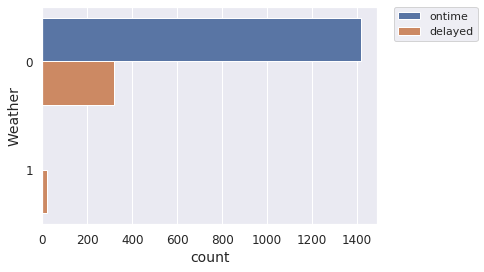

In [0]:
ax = sns.countplot(y="Weather", hue='Target', data=data)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Observations:
from the plot above, we can see that when the weather is not inclement or when weather is stable (0) most flights arrive ontime. But we don't see any ontime arrival when the weather is bad. This shows a high correlation between weather and flight status

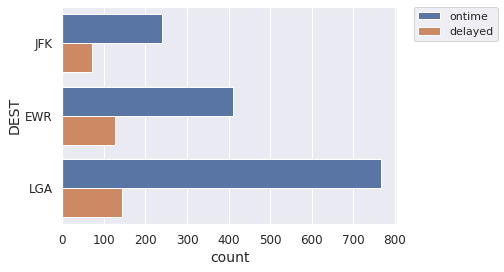

In [0]:
ax = sns.countplot(y="DEST", hue='Target', data=data)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Observations:
Flights to LGA (LaGuardia Airport) have the highest ontime arrival

#Question 3

Data Preprocessing & Feature Selection/Engineering

A. The data set contains no missing value

if we had missing data, we can use some of the codes below to deal with them

In [0]:
data.isnull().sum()

CRS_DEP_TIME    0
CARRIER         0
DEP_TIME        0
DEST            0
DISTANCE        0
FL_DATE         0
FL_NUM          0
ORIGIN          0
Weather         0
DAY_WEEK        0
DAY_OF_MONTH    0
TAIL_NUM        0
Target          0
dtype: int64

In [0]:
data.dropna

In [0]:
data.shape

(1760, 13)

##3B

#### 1. The variable DEP_TIME (actual departure time) cannot be used for predicting new flights. Why? Briefly explain. 

The actual departure time cannot single-handedly be used to make future flight predictions because it will not give a correct result. we have to take into account the scheduled departure time, that way we know if there was a delay and can accurately classify the flight

####2. Create a new categorical variable by binning the scheduled departure time (CRS_DEP_TIME) into 2-hour bins. 

In [0]:
data['sched_dep_time'] = pd.cut(x=data['CRS_DEP_TIME'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

In [0]:
hours = pd.to_datetime(data['CRS_DEP_TIME']).dt.hour

data['sched_dep_time'] = pd.cut(hours, 
                    bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], 
                  include_lowest=True )

In [0]:
print (data)

      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE    FL_DATE  FL_NUM ORIGIN  \
1233           925      MQ       919  JFK       213 2004-01-18    4771    DCA   
992           1900      CO      1915  EWR       199 2004-01-14     816    DCA   
1558          1700      MQ      1652  LGA       214 2004-01-22    4972    DCA   
2009          1630      DL      1629  LGA       214 2004-01-29    1760    DCA   
1486          1700      US      1658  LGA       214 2004-01-21    2180    DCA   
...            ...     ...       ...  ...       ...        ...     ...    ...   
145           1720      RU      1714  EWR       169 2004-01-03    2675    BWI   
941           1610      DH      1631  JFK       228 2004-01-14    7816    IAD   
1754          1630      DL      1633  LGA       214 2004-01-25    1760    DCA   
1297          1100      MQ      1100  LGA       214 2004-01-19    4960    DCA   
1081          1455      OH      1455  JFK       184 2004-01-16    5935    BWI   

      Weather  DAY_WEEK  DA

In [0]:
hours = pd.to_datetime(test_data['CRS_DEP_TIME']).dt.hour

test_data['sched_dep_time'] = pd.cut(hours, 
                    bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], 
                  include_lowest=True )

In [0]:
print (test_data)

      CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE    FL_DATE  FL_NUM ORIGIN  \
1768          1000      US       954  LGA       214 2004-01-25    2166    DCA   
1867          1245      DH      1409  LGA       229 2004-01-27    7208    IAD   
456           1710      DH      1725  EWR       213 2004-01-07    7302    IAD   
1657          2100      US      2055  LGA       214 2004-01-23    2188    DCA   
1530          1610      DH      1607  JFK       228 2004-01-22    7816    IAD   
...            ...     ...       ...  ...       ...        ...     ...    ...   
2041          2100      US      2055  LGA       214 2004-01-29    2188    DCA   
1508          1630      RU      1648  EWR       199 2004-01-21    2181    DCA   
778           1030      DL      1028  LGA       214 2004-01-12    1748    DCA   
1788          1710      DH      1720  EWR       213 2004-01-25    7302    IAD   
2037          1700      US      1659  LGA       214 2004-01-29    2180    DCA   

      Weather  DAY_WEEK  DA

####3. Drop the original variable CRS_DEP_TIME from the data to be analyzed and keep the
new categorical variable. 

In [0]:
data1= data.drop('CRS_DEP_TIME', axis =1)
data1

,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Target,sched_dep_time
1233,MQ,919,JFK,213,2004-01-18,4771,DCA,0,7,18,N719MQ,ontime,"(-0.001, 2.0]"
992,CO,1915,EWR,199,2004-01-14,816,DCA,0,3,14,N14667,ontime,"(-0.001, 2.0]"
1558,MQ,1652,LGA,214,2004-01-22,4972,DCA,0,4,22,N814MQ,ontime,"(-0.001, 2.0]"
2009,DL,1629,LGA,214,2004-01-29,1760,DCA,0,4,29,N225DL,ontime,"(-0.001, 2.0]"
1486,US,1658,LGA,214,2004-01-21,2180,DCA,0,3,21,N744UW,ontime,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,RU,1714,EWR,169,2004-01-03,2675,BWI,0,6,3,N15574,ontime,"(-0.001, 2.0]"
941,DH,1631,JFK,228,2004-01-14,7816,IAD,0,3,14,N315UE,ontime,"(-0.001, 2.0]"
1754,DL,1633,LGA,214,2004-01-25,1760,DCA,0,7,25,N231DN,ontime,"(-0.001, 2.0]"
1297,MQ,1100,LGA,214,2004-01-19,4960,DCA,0,1,19,N722MQ,ontime,"(-0.001, 2.0]"


In [0]:
test_data1= test_data.drop('CRS_DEP_TIME', axis =1)
test_data1

,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Target,sched_dep_time
1768,US,954,LGA,214,2004-01-25,2166,DCA,0,7,25,N767UW,ontime,"(-0.001, 2.0]"
1867,DH,1409,LGA,229,2004-01-27,7208,IAD,1,2,27,N661BR,delayed,"(-0.001, 2.0]"
456,DH,1725,EWR,213,2004-01-07,7302,IAD,0,3,7,N696BR,ontime,"(-0.001, 2.0]"
1657,US,2055,LGA,214,2004-01-23,2188,DCA,0,5,23,N768UW,ontime,"(-0.001, 2.0]"
1530,DH,1607,JFK,228,2004-01-22,7816,IAD,0,4,22,N324UE,ontime,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,US,2055,LGA,214,2004-01-29,2188,DCA,0,4,29,N711UW,ontime,"(-0.001, 2.0]"
1508,RU,1648,EWR,199,2004-01-21,2181,DCA,0,3,21,N36915,delayed,"(-0.001, 2.0]"
778,DL,1028,LGA,214,2004-01-12,1748,DCA,0,1,12,N223DZ,ontime,"(-0.001, 2.0]"
1788,DH,1720,EWR,213,2004-01-25,7302,IAD,0,7,25,N671BR,ontime,"(-0.001, 2.0]"


####4.Drop the variables DISTANCE and FL_DATE from the dataset. What would be the reasons to do so? Think and provide possible explanation


I would think they are being dropped because they are not necessary for our prediction. I dropped the Tail_num which is the airplane number as well because i dont find it useful to my analysis and it is not suitable of for one-hot encoding 

In [0]:
data2= data1.drop('DISTANCE', axis =1).drop('FL_DATE', axis =1).drop('TAIL_NUM', axis =1)
data2

,CARRIER,DEP_TIME,DEST,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Target,sched_dep_time
1233,MQ,919,JFK,4771,DCA,0,7,18,ontime,"(-0.001, 2.0]"
992,CO,1915,EWR,816,DCA,0,3,14,ontime,"(-0.001, 2.0]"
1558,MQ,1652,LGA,4972,DCA,0,4,22,ontime,"(-0.001, 2.0]"
2009,DL,1629,LGA,1760,DCA,0,4,29,ontime,"(-0.001, 2.0]"
1486,US,1658,LGA,2180,DCA,0,3,21,ontime,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...
145,RU,1714,EWR,2675,BWI,0,6,3,ontime,"(-0.001, 2.0]"
941,DH,1631,JFK,7816,IAD,0,3,14,ontime,"(-0.001, 2.0]"
1754,DL,1633,LGA,1760,DCA,0,7,25,ontime,"(-0.001, 2.0]"
1297,MQ,1100,LGA,4960,DCA,0,1,19,ontime,"(-0.001, 2.0]"


In [0]:
test_data2= test_data1.drop('DISTANCE', axis =1).drop('FL_DATE', axis =1).drop('TAIL_NUM', axis =1)
test_data2

,CARRIER,DEP_TIME,DEST,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Target,sched_dep_time
1768,US,954,LGA,2166,DCA,0,7,25,ontime,"(-0.001, 2.0]"
1867,DH,1409,LGA,7208,IAD,1,2,27,delayed,"(-0.001, 2.0]"
456,DH,1725,EWR,7302,IAD,0,3,7,ontime,"(-0.001, 2.0]"
1657,US,2055,LGA,2188,DCA,0,5,23,ontime,"(-0.001, 2.0]"
1530,DH,1607,JFK,7816,IAD,0,4,22,ontime,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...
2041,US,2055,LGA,2188,DCA,0,4,29,ontime,"(-0.001, 2.0]"
1508,RU,1648,EWR,2181,DCA,0,3,21,delayed,"(-0.001, 2.0]"
778,DL,1028,LGA,1748,DCA,0,1,12,ontime,"(-0.001, 2.0]"
1788,DH,1720,EWR,7302,IAD,0,7,25,ontime,"(-0.001, 2.0]"


Separate the predictors and the labels

We need to setup the X (DataFrame) and y (series) appropriately for using `scikit-learn` API

In [0]:
data = data2.drop('Target', axis=1) # drop labels for training set
data_labels = data2['Target'].copy()

In [0]:
data.head()

,CARRIER,DEP_TIME,DEST,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,sched_dep_time
1233,MQ,919,JFK,4771,DCA,0,7,18,"(-0.001, 2.0]"
992,CO,1915,EWR,816,DCA,0,3,14,"(-0.001, 2.0]"
1558,MQ,1652,LGA,4972,DCA,0,4,22,"(-0.001, 2.0]"
2009,DL,1629,LGA,1760,DCA,0,4,29,"(-0.001, 2.0]"
1486,US,1658,LGA,2180,DCA,0,3,21,"(-0.001, 2.0]"


In [0]:
data_labels.head(7)

1233     ontime
992      ontime
1558     ontime
2009     ontime
1486     ontime
1590     ontime
1737    delayed
Name: Target, dtype: object

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1233 to 1081
Data columns (total 9 columns):
CARRIER           1760 non-null object
DEP_TIME          1760 non-null int64
DEST              1760 non-null object
FL_NUM            1760 non-null int64
ORIGIN            1760 non-null object
Weather           1760 non-null int64
DAY_WEEK          1760 non-null int64
DAY_OF_MONTH      1760 non-null int64
sched_dep_time    1760 non-null category
dtypes: category(1), int64(5), object(3)
memory usage: 206.0+ KB


In [0]:
test_data = test_data2.drop('Target', axis=1) # drop labels for test set
test_data_labels = test_data2['Target'].copy()

In [0]:
test_data.head()

,CARRIER,DEP_TIME,DEST,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,sched_dep_time
1768,US,954,LGA,2166,DCA,0,7,25,"(-0.001, 2.0]"
1867,DH,1409,LGA,7208,IAD,1,2,27,"(-0.001, 2.0]"
456,DH,1725,EWR,7302,IAD,0,3,7,"(-0.001, 2.0]"
1657,US,2055,LGA,2188,DCA,0,5,23,"(-0.001, 2.0]"
1530,DH,1607,JFK,7816,IAD,0,4,22,"(-0.001, 2.0]"


In [0]:
test_data_labels.head()

1768     ontime
1867    delayed
456      ontime
1657     ontime
1530     ontime
Name: Target, dtype: object

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1768 to 2037
Data columns (total 9 columns):
CARRIER           441 non-null object
DEP_TIME          441 non-null int64
DEST              441 non-null object
FL_NUM            441 non-null int64
ORIGIN            441 non-null object
Weather           441 non-null int64
DAY_WEEK          441 non-null int64
DAY_OF_MONTH      441 non-null int64
sched_dep_time    441 non-null category
dtypes: category(1), int64(5), object(3)
memory usage: 31.9+ KB


##3C

Handle the following categorical variables in the data using the one-hot encoding approach.
How many new variables would you get as a result of this one-hot encoding? Explain.


**Answer**: One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. After pocessing my categorical data using one-hot encoding my variables increased to 19. I dropped the Tail_num which is the airplane number because i dont find it useful to my analysis and it is not suitable of for one-hot encoding 

In [0]:
all_features = data.columns
all_features

Index(['CARRIER', 'DEP_TIME', 'DEST', 'FL_NUM', 'ORIGIN', 'Weather',
       'DAY_WEEK', 'DAY_OF_MONTH', 'sched_dep_time'],
      dtype='object')

#### Selecting categorical features

In [0]:
cat_attribs = list(data.select_dtypes(include=['category', 'object']).columns) 

#### Data with only the selected categorical attributes

In [0]:
data_cat = data[cat_attribs]
data_cat.head()

,CARRIER,DEST,ORIGIN,sched_dep_time
1233,MQ,JFK,DCA,"(-0.001, 2.0]"
992,CO,EWR,DCA,"(-0.001, 2.0]"
1558,MQ,LGA,DCA,"(-0.001, 2.0]"
2009,DL,LGA,DCA,"(-0.001, 2.0]"
1486,US,LGA,DCA,"(-0.001, 2.0]"


In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', sparse=True)
print(ohe.fit_transform(data_cat)) # converts all the columns (string and integer) to one-hot encoded columns

  (0, 3)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 14)	1.0
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 14)	1.0
  (2, 3)	1.0
  (2, 10)	1.0
  (2, 12)	1.0
  (2, 14)	1.0
  (3, 2)	1.0
  (3, 10)	1.0
  (3, 12)	1.0
  (3, 14)	1.0
  (4, 7)	1.0
  (4, 10)	1.0
  (4, 12)	1.0
  (4, 14)	1.0
  (5, 1)	1.0
  (5, 8)	1.0
  (5, 13)	1.0
  (5, 14)	1.0
  (6, 1)	1.0
  :	:
  (1753, 14)	1.0
  (1754, 0)	1.0
  (1754, 8)	1.0
  (1754, 12)	1.0
  (1754, 14)	1.0
  (1755, 5)	1.0
  (1755, 8)	1.0
  (1755, 11)	1.0
  (1755, 14)	1.0
  (1756, 1)	1.0
  (1756, 9)	1.0
  (1756, 13)	1.0
  (1756, 14)	1.0
  (1757, 2)	1.0
  (1757, 10)	1.0
  (1757, 12)	1.0
  (1757, 14)	1.0
  (1758, 3)	1.0
  (1758, 10)	1.0
  (1758, 12)	1.0
  (1758, 14)	1.0
  (1759, 4)	1.0
  (1759, 9)	1.0
  (1759, 11)	1.0
  (1759, 14)	1.0


In [0]:
all_features = data.columns
print("Total Number of Columns: {}".format(len(list(all_features))))

Total Number of Columns: 9


##3D 
Weather is coded as 1 if there was a weather-delay. Would you need to use one-hot encoding
for this variable? Why or why not? Explain and take the appropriate action.

**Answer**:
Weather is binary, therefore columnTransformer would be used to handle ordinal variables not one-hot encoder


In [0]:
ord_attribs = ['Weather'] 
ord_attribs

['Weather']

In [0]:
data_ord = data[ord_attribs]
data_ord.head()

,Weather
1233,0
992,0
1558,0
2009,0
1486,0


In [0]:
for c in data_ord.columns:
    print("---- {0} ---".format(c))
    print(data_ord[c].value_counts())

---- Weather ---
0    1738
1      22
Name: Weather, dtype: int64


In [0]:
ord_attrib_Weather = ['Weather']

data_ord_attrib_Weather = data[ord_attrib_Weather]

In [0]:
data_ord_attrib_Weather.head()

,Weather
1233,0
992,0
1558,0
2009,0
1486,0


#### Selecting numerical features

In [0]:
num_attribs = list(data.select_dtypes(include='number').columns)

In [0]:
num_attribs = ['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']
num_attribs

['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']

In [0]:
data_num = data[num_attribs]
data_num.head()

,FL_NUM,DAY_WEEK,DAY_OF_MONTH
1233,4771,7,18
992,816,3,14
1558,4972,4,22
2009,1760,4,29
1486,2180,3,21


In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))
print(mms.fit_transform(data_num))

[[0.561 1.000 0.567]
 [0.010 0.333 0.433]
 [0.589 0.500 0.700]
 ...
 [0.141 1.000 0.800]
 [0.587 0.000 0.600]
 [0.723 0.667 0.500]]


In [0]:
# demonstrating how StandardScaler would work

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
print(ss.fit_transform(data_num))

[[0.402 1.592 0.254]
 [-1.244 -0.491 -0.204]
 [0.485 0.030 0.713]
 ...
 [-0.851 1.592 1.056]
 [0.480 -1.533 0.369]
 [0.886 0.550 0.025]]


## Setting up the pipeline

#### Pipeline for numerical attributes

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Our training data does not have any missing values, but it is a good idea to incorporate missing value imputation strategy
# in the pipeline, in case the unseen data has any missing values.
# Also, we can create two versions of this pipeline, one with scaling and another without scaling, to use different ones with different models.

num_pipe_scaled = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")), # missing value strategy is based on median values.
    ('num_std_scaler', StandardScaler()),
])

num_pipe_notscaled = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")), # missing value strategy is based on median values.
])

##### Pipeline for ordinal attributes (includes binary numerical (0/1) attributes)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

ord_pipe_Weather = Pipeline([
    ('cat_ord_imp_Weather', SimpleImputer(strategy="most_frequent")),
    ('cat_ord_enc_Weather', OrdinalEncoder(categories=[['0', '1']]))
])



##### Pipeline for categorical attributes 

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipe = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('cat_onehot_encoder', OneHotEncoder())
    ])

In [0]:
from sklearn.compose import ColumnTransformer

prep_pipe_scaled = ColumnTransformer([
    ("num_scaling", num_pipe_scaled, num_attribs), # numerical attributes with scaling
    ("ord_Weather", ord_pipe_Weather, ord_attrib_Weather),
    ("cat", cat_pipe, cat_attribs),
])

We could also create another pipeline without scaling numerical attributes, say while using tree-based models.

In [0]:
from sklearn.compose import ColumnTransformer

prep_pipe_notscaled = ColumnTransformer([
    ("num_noscaling", num_pipe_notscaled, num_attribs), # numerical attributes without scaling
    ("ord_Weather", ord_pipe_Weather, ord_attrib_Weather),
    ("cat", cat_pipe, cat_attribs),
])

In [0]:
data_prepared = prep_pipe_scaled.fit_transform(data)

In [0]:
data_prepared.shape

(1760, 19)

In [0]:
prep_pipe_scaled.transformers_

[('num_scaling', Pipeline(memory=None,
           steps=[('num_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0)),
                  ('num_std_scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True))],
           verbose=False), ['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']),
 ('ord_Weather', Pipeline(memory=None,
           steps=[('cat_ord_imp_Weather',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0)),
                  ('cat_ord_enc_Weather',
                   OrdinalEncoder(categories=[['0', '1']],
                                  dtype=<class 'numpy.float64'>))],
           verbose=False), ['Weather']),
 ('cat', Pipeline(memory=None,
           ste

In [0]:
data_prepared[:5,:]

array([[0.402, 1.592, 0.254, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 1.000, 0.000,
        1.000],
       [-1.244, -0.491, -0.204, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        1.000],
       [0.485, 0.030, 0.713, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000, 0.000,
        1.000],
       [-0.851, 0.030, 1.515, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000, 0.000,
        1.000],
       [-0.676, -0.491, 0.598, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 1.000, 0.000, 0.000, 1.000, 0.000, 1.000, 0.000,
        1.000]])

####Binarize Labels (Target) and Specify Negative and Positive Classes

In [0]:
data_labels

1233    ontime
992     ontime
1558    ontime
2009    ontime
1486    ontime
         ...  
145     ontime
941     ontime
1754    ontime
1297    ontime
1081    ontime
Name: Target, Length: 1760, dtype: object

In [0]:
from sklearn.preprocessing import label_binarize

data_labels_arr = label_binarize(data_labels, classes=['ontime', 'delayed'])
data_labels_arr[:8]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [0]:
data_labels.head(7)

1233     ontime
992      ontime
1558     ontime
2009     ontime
1486     ontime
1590     ontime
1737    delayed
Name: Target, dtype: object

In [0]:
test_data_labels_arr = label_binarize(test_data_labels, classes=['ontime', 'delayed'])
test_data_labels_arr[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [0]:
test_data_labels.head()

1768     ontime
1867    delayed
456      ontime
1657     ontime
1530     ontime
Name: Target, dtype: object

 we can assemble all the transformers together.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



num_pipe_scaled = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")), # missing value strategy is based on median values.
    ('num_std_scaler', StandardScaler()),
])

num_pipe_notscaled = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")), # missing value strategy is based on median values.
])

ord_pipe_Weather = Pipeline([
    ('cat_ord_imp_Weather', SimpleImputer(strategy="most_frequent")),
    ('cat_ord_enc_Weather', OrdinalEncoder(categories=[['0', '1']]))
])

cat_pipe = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('cat_onehot_encoder', OneHotEncoder())
    ])

prep_pipe_scaled = ColumnTransformer([
    ("num_scaling", num_pipe_scaled, num_attribs), # numerical attributes with scaling
    ("ord_Weather", ord_pipe_Weather, ord_attrib_Weather),
    ("cat", cat_pipe, cat_attribs),
])

prep_pipe_notscaled = ColumnTransformer([
    ("num_noscaling", num_pipe_notscaled, num_attribs), # numerical attributes without scaling
    ("ord_Weather", ord_pipe_Weather, ord_attrib_Weather),
    ("cat", cat_pipe, cat_attribs),
])

data_prepared = prep_pipe_scaled.fit_transform(data)

data_prepared[:4, :]

array([[0.402, 1.592, 0.254, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 1.000, 0.000,
        1.000],
       [-1.244, -0.491, -0.204, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        1.000],
       [0.485, 0.030, 0.713, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000, 0.000,
        1.000],
       [-0.851, 0.030, 1.515, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 1.000, 0.000,
        1.000]])

#Question 5 

####Model Training and Validation

Select any two classification algorithms listed in Q6 below and demonstrate how to find
the “best” hyperparameters for each of these two models with grid search using 5-fold cross-validation
experimenting with 1-2 parameters in each case.  

###Model Selection along with Grid Search with Cross-Validation

- Here, we will select among **Random Forest classifier** and **Gradient Boosting classifier** and **tune the best algorithm** in a single step.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# start with the Random Forest Classifier pipeline but we will modify this later with the parameter grid
pipe = Pipeline([
        ("preprocessor", prep_pipe_scaled),
        ("classifier", RandomForestClassifier())
    ])


param_grid = [
    {'preprocessor': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'classifier': [RandomForestClassifier()],
     'classifier__max_features': ['sqrt', 'log2'],
     'classifier__n_estimators': [100, 200, 500],
     'classifier__max_depth': [3, 5, None],
    },
    {'preprocessor': [prep_pipe_scaled, prep_pipe_notscaled], # check whether it is better to scale or not
     'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': [100, 200, 300],
     'classifier__max_depth': [3, 5, 10],
    }]

In [0]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5,
                    scoring='accuracy',
                    iid=False, n_jobs=-1, verbose=1)

%time grid.fit(data, data_labels)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.1min finished


CPU times: user 4.46 s, sys: 121 ms, total: 4.58 s
Wall time: 3min 9s
Best cross-validation score: 0.82


In [0]:
print("\n".join("{}:{}\n".format(k, v) for k, v in grid.best_params_.items()))

classifier:GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

classifier__max_depth:3

classifier__n_estimators:300

preprocessor:ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_noscaling',
                                 Pipeline(memory=None,
                        

In [0]:
# extract the best estimator found
print("Best estimator::")
print("\n".join("{}:\n{}\n".format(k, v) for k, v in grid.best_estimator_.steps))

Best estimator::
preprocessor:
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_noscaling',
                                 Pipeline(memory=None,
                                          steps=[('num_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0))],
                                          verbose=False),
                                 ['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']),
                                ('ord_Weather',
                  

In [0]:
grid.best_estimator_.named_steps['preprocessor'].transformers

[('num_noscaling', Pipeline(memory=None,
           steps=[('num_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']),
 ('ord_Weather', Pipeline(memory=None,
           steps=[('cat_ord_imp_Weather',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0)),
                  ('cat_ord_enc_Weather',
                   OrdinalEncoder(categories=[['0', '1']],
                                  dtype=<class 'numpy.float64'>))],
           verbose=False), ['Weather']),
 ('cat', Pipeline(memory=None,
           steps=[('cat_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
           

In [0]:
grid.best_estimator_.named_steps['classifier']

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Observation:
Best estimator is GradientBoostingClassifier with hyper parameters defined above.

#Question 6

 Run a 5-fold cross-validation using the following algorithms. For the two algorithms used
in Q5, use the “best” hyperparameter configuration obtained. You can specify any other model
parameters appropriately.
A. Logistic Regression
B. Decision Tree
C. Support Vector Machine
D. Random Forest (ensemble of decision trees)
E. Ensemble (be creative on what kind of ensemble would you use)

### 1. Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier


tree_pipe = Pipeline([
    ("prep", prep_pipe_notscaled),
    ("tree", DecisionTreeClassifier(max_depth = 5)),
])

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=tree_pipe, 
                        X=data, y=data_labels_arr, 
                        cv=5, n_jobs=-1,
                        scoring=scoring)

#print("\n".join("{}:\n{}\n".format(k, v) for k, v in scores.items()))

print("Number of cv iterations: {0}".format(len(scores['test_accuracy'])))
print('Accuracy from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_accuracy'].mean(), stats.sem(scores['test_accuracy'])))
print('Precision from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_precision'].mean(), stats.sem(scores['test_precision'])))
print('Recall from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_recall'].mean(), stats.sem(scores['test_recall'])))
print('F1 Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_f1_score'].mean(), stats.sem(scores['test_f1_score'])))
print('AUC Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_roc_auc'].mean(), stats.sem(scores['test_roc_auc'])))


Number of cv iterations: 5
Accuracy from 5-fold Cross-validation: 0.815 ± 0.006
Precision from 5-fold Cross-validation: 0.696 ± 0.103
Recall from 5-fold Cross-validation: 0.102 ± 0.018
F1 Score from 5-fold Cross-validation: 0.175 ± 0.029
AUC Score from 5-fold Cross-validation: 0.675 ± 0.022


In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

### 2. Logistic Regression Classifier

In [0]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
    ("prep", prep_pipe_scaled),
    ("logreg", LogisticRegression(solver='liblinear', C=10)),
])

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

from sklearn.model_selection import cross_validate
scores = cross_validate(estimator=logreg_pipe, 
                        X=data, y=data_labels_arr, 
                        cv=5, n_jobs=-1,
                        scoring=scoring)

# uncomment to see all scores
#print("\n".join("{}:\n{}\n".format(k, v) for k, v in scores.items()))

print("Number of cv iterations: {0}".format(len(scores['test_accuracy'])))
print('Accuracy from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_accuracy'].mean(), stats.sem(scores['test_accuracy'])))
print('Precision from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_precision'].mean(), stats.sem(scores['test_precision'])))
print('Recall from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_recall'].mean(), stats.sem(scores['test_recall'])))
print('F1 Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_f1_score'].mean(), stats.sem(scores['test_f1_score'])))
print('AUC Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_roc_auc'].mean(), stats.sem(scores['test_roc_auc'])))


Number of cv iterations: 5
Accuracy from 5-fold Cross-validation: 0.818 ± 0.003
Precision from 5-fold Cross-validation: 1.000 ± 0.000
Recall from 5-fold Cross-validation: 0.064 ± 0.014
F1 Score from 5-fold Cross-validation: 0.120 ± 0.024
AUC Score from 5-fold Cross-validation: 0.649 ± 0.021


### 3. Kernelized Support Vector Machine (SVM) Classifier

In [0]:
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ("prep", prep_pipe_scaled),
    ("svm", SVC(kernel='rbf', gamma='auto')),
])

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

from sklearn.model_selection import cross_validate
scores = cross_validate(estimator=svm_pipe, 
                        X=data, y=data_labels_arr, 
                        cv=5, n_jobs=-1,
                        scoring=scoring)

# uncomment to see all scores
#print("\n".join("{}:\n{}\n".format(k, v) for k, v in scores.items()))

print("Number of cv iterations: {0}".format(len(scores['test_accuracy'])))
print('Accuracy from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_accuracy'].mean(), stats.sem(scores['test_accuracy'])))
print('Precision from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_precision'].mean(), stats.sem(scores['test_precision'])))
print('Recall from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_recall'].mean(), stats.sem(scores['test_recall'])))
print('F1 Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_f1_score'].mean(), stats.sem(scores['test_f1_score'])))
print('AUC Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_roc_auc'].mean(), stats.sem(scores['test_roc_auc'])))


Number of cv iterations: 5
Accuracy from 5-fold Cross-validation: 0.817 ± 0.002
Precision from 5-fold Cross-validation: 1.000 ± 0.000
Recall from 5-fold Cross-validation: 0.059 ± 0.010
F1 Score from 5-fold Cross-validation: 0.110 ± 0.019
AUC Score from 5-fold Cross-validation: 0.669 ± 0.021


### 4. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("prep", prep_pipe_notscaled),
    ("rf", RandomForestClassifier(n_estimators=200)),
])

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

from sklearn.model_selection import cross_validate
scores = cross_validate(estimator=rf_pipe, 
                        X=data, y=data_labels_arr, 
                        cv=5, n_jobs=-1,
                        scoring=scoring)

# uncomment to see all scores
#print("\n".join("{}:\n{}\n".format(k, v) for k, v in scores.items()))

print("Number of cv iterations: {0}".format(len(scores['test_accuracy'])))
print('Accuracy from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_accuracy'].mean(), stats.sem(scores['test_accuracy'])))
print('Precision from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_precision'].mean(), stats.sem(scores['test_precision'])))
print('Recall from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_recall'].mean(), stats.sem(scores['test_recall'])))
print('F1 Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_f1_score'].mean(), stats.sem(scores['test_f1_score'])))
print('AUC Score from 5-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_roc_auc'].mean(), stats.sem(scores['test_roc_auc'])))


Number of cv iterations: 5
Accuracy from 5-fold Cross-validation: 0.803 ± 0.003
Precision from 5-fold Cross-validation: 0.490 ± 0.013
Recall from 5-fold Cross-validation: 0.286 ± 0.012
F1 Score from 5-fold Cross-validation: 0.361 ± 0.012
AUC Score from 5-fold Cross-validation: 0.718 ± 0.015


### 5. Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_pipe = Pipeline([
    ("prep", prep_pipe_notscaled),
    ("gbc", GradientBoostingClassifier(n_estimators=200, max_depth=3)),
])

scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1_score': 'f1', 'roc_auc': 'roc_auc'}

from sklearn.model_selection import cross_validate
scores = cross_validate(estimator=gbc_pipe, 
                        X=data, y=data_labels_arr, 
                        cv=5, n_jobs=-1,
                        scoring=scoring)

# uncomment to see all scores
#print("\n".join("{}:\n{}\n".format(k, v) for k, v in scores.items()))

print("Number of cv iterations: {0}".format(len(scores['test_accuracy'])))
print('Accuracy from 10-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_accuracy'].mean(), stats.sem(scores['test_accuracy'])))
print('Precision from 10-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_precision'].mean(), stats.sem(scores['test_precision'])))
print('Recall from 10-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_recall'].mean(), stats.sem(scores['test_recall'])))
print('F1 Score from 10-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_f1_score'].mean(), stats.sem(scores['test_f1_score'])))
print('AUC Score from 10-fold Cross-validation: {0:.3f} ± {1:.3f}'.format(scores['test_roc_auc'].mean(), stats.sem(scores['test_roc_auc'])))


Number of cv iterations: 5
Accuracy from 10-fold Cross-validation: 0.821 ± 0.009
Precision from 10-fold Cross-validation: 0.587 ± 0.044
Recall from 10-fold Cross-validation: 0.281 ± 0.031
F1 Score from 10-fold Cross-validation: 0.377 ± 0.034
AUC Score from 10-fold Cross-validation: 0.756 ± 0.009



### Observation:
- Based on the model evaluation with 5-fold cross-validation, we see that Gradient Boosting Classifier performs the best. 
- We can now apply this selected model on the test data before model deployment.

#QUESTION 7

Run the “best model” found on the test partition, validating it one more time prior to
model deployment. Comment on the results.

## Test the Best Model with the Test Data (Holdout Data)

In [0]:
gbc_pipe.steps

[('prep',
  ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                    transformer_weights=None,
                    transformers=[('num_noscaling',
                                   Pipeline(memory=None,
                                            steps=[('num_imputer',
                                                    SimpleImputer(add_indicator=False,
                                                                  copy=True,
                                                                  fill_value=None,
                                                                  missing_values=nan,
                                                                  strategy='median',
                                                                  verbose=0))],
                                            verbose=False),
                                   ['FL_NUM', 'DAY_WEEK', 'DAY_OF_MONTH']),
                                  ('ord_Weather',
           

In [0]:
gbc_pipe.steps[1][1]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
type(gbc_pipe.steps[1][1])

sklearn.ensemble.gradient_boosting.GradientBoostingClassifier

Before testing the selected model with the test data, let's fit it on the entire training data.

In [0]:
best_model = gbc_pipe

In [0]:
best_model.fit(data, data_labels_arr.ravel())

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_noscaling',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                       

- We can also analyze the feature importances for this model.

In [0]:
best_model.steps[1][1].feature_importances_

array([0.310, 0.122, 0.270, 0.133, 0.002, 0.001, 0.003, 0.007, 0.006,
       0.016, 0.001, 0.000, 0.032, 0.028, 0.049, 0.009, 0.008, 0.001,
       0.000])

In [0]:
data.columns

Index(['CARRIER', 'DEP_TIME', 'DEST', 'FL_NUM', 'ORIGIN', 'Weather',
       'DAY_WEEK', 'DAY_OF_MONTH', 'sched_dep_time'],
      dtype='object')

In [0]:
test_data_pred = best_model.predict(test_data)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

print("Accuracy for the holdout data is: {:.3f}\n".format(accuracy_score(test_data_labels_arr.ravel(), test_data_pred)))
print("Precision for the holdout data is: {:.3f}\n".format(precision_score(test_data_labels_arr.ravel(), test_data_pred)))
print("Recall for the holdout data is: {:.3f}\n".format(recall_score(test_data_labels_arr.ravel(), test_data_pred)))
print("F1-score for the holdout data is: {:.3f}\n".format(f1_score(test_data_labels_arr.ravel(), test_data_pred)))
print("AUC for the holdout data is: {:.3f}\n".format(roc_auc_score(test_data_labels_arr.ravel(), test_data_pred)))

Accuracy for the holdout data is: 0.844

Precision for the holdout data is: 0.707

Recall for the holdout data is: 0.337

F1-score for the holdout data is: 0.457

AUC for the holdout data is: 0.652



#Extra Credit

##Modeling Using Deep Learning

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split
#split the entire set into train-test
X_train_full, X_test, y_train_full, y_test = train_test_split(data_prepared, data_labels_arr, random_state=42)

#split the training data into train-validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
#perform standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
X_train.shape

(990, 19)

In [0]:
X_train.shape[1:]

(19,)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [0]:
keras.backend.clear_session()
np.random.seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers

In [0]:
hidden1 = model.layers[0]
hidden1.name

'dense'

In [0]:
weights, biases = hidden1.get_weights()

In [0]:
weights.shape

(19, 30)

In [0]:
biases.shape

(30,)

In [0]:
from tensorflow.keras import backend

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
 optimizer=keras.optimizers.SGD(),
 metrics=[keras.metrics.sparse_categorical_accuracy])

In [0]:
%time history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [0]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[-1.413],
       [0.239],
       [-1.070]], dtype=float32)